# Import required libraries


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Features explanation


```
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
```



# Load and prepare the dataset



In [7]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv', delim_whitespace=True, header=None, names=column_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.shape

(506, 14)

# Handle missing vlaues


```
In this dataset, there is no missing values. So I don't need to handle missing values.
```




In [30]:
# Check for missing values
df.isnull().sum()


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# Visualizations

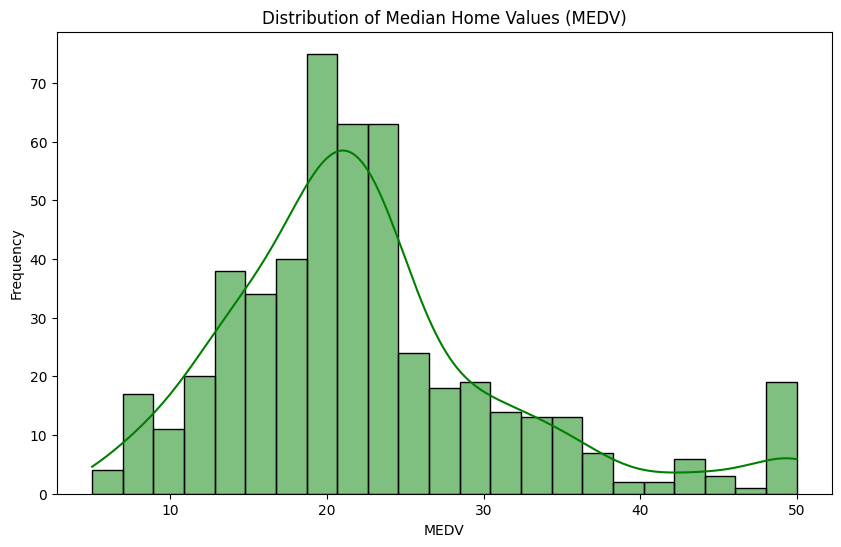

In [101]:
# Visualize the distribution of the target variable (e.g., 'MEDV')
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], kde=True, color='green')
plt.title("Distribution of Median Home Values (MEDV)")
plt.xlabel("MEDV")
plt.ylabel("Frequency")
plt.show()



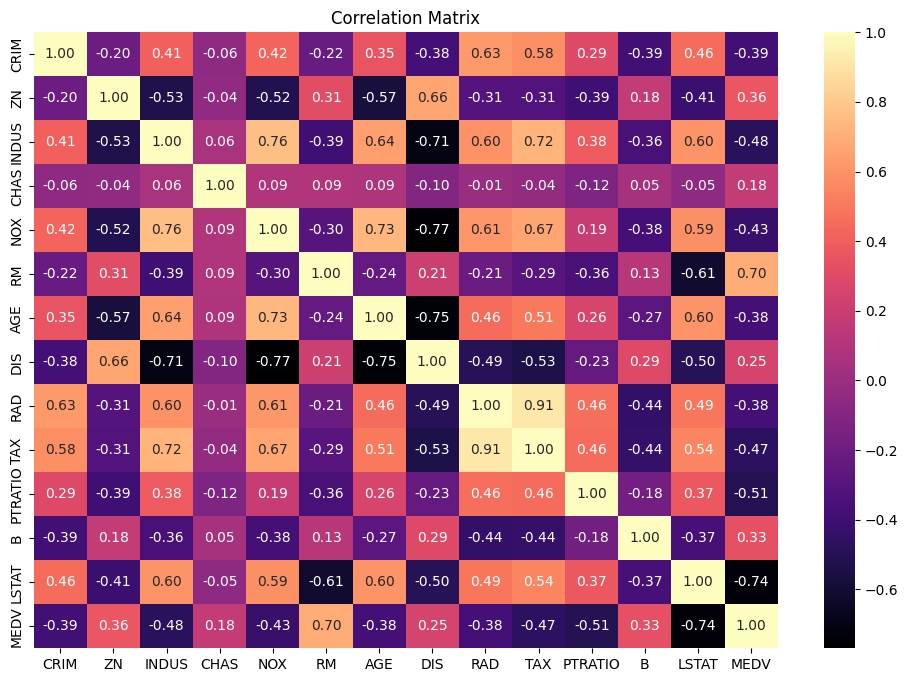

In [104]:
    # Correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='magma', fmt='.2f')
    #sns.heatmap(df.corr().abs(), annot=True)
    plt.title('Correlation Matrix')
    plt.show()

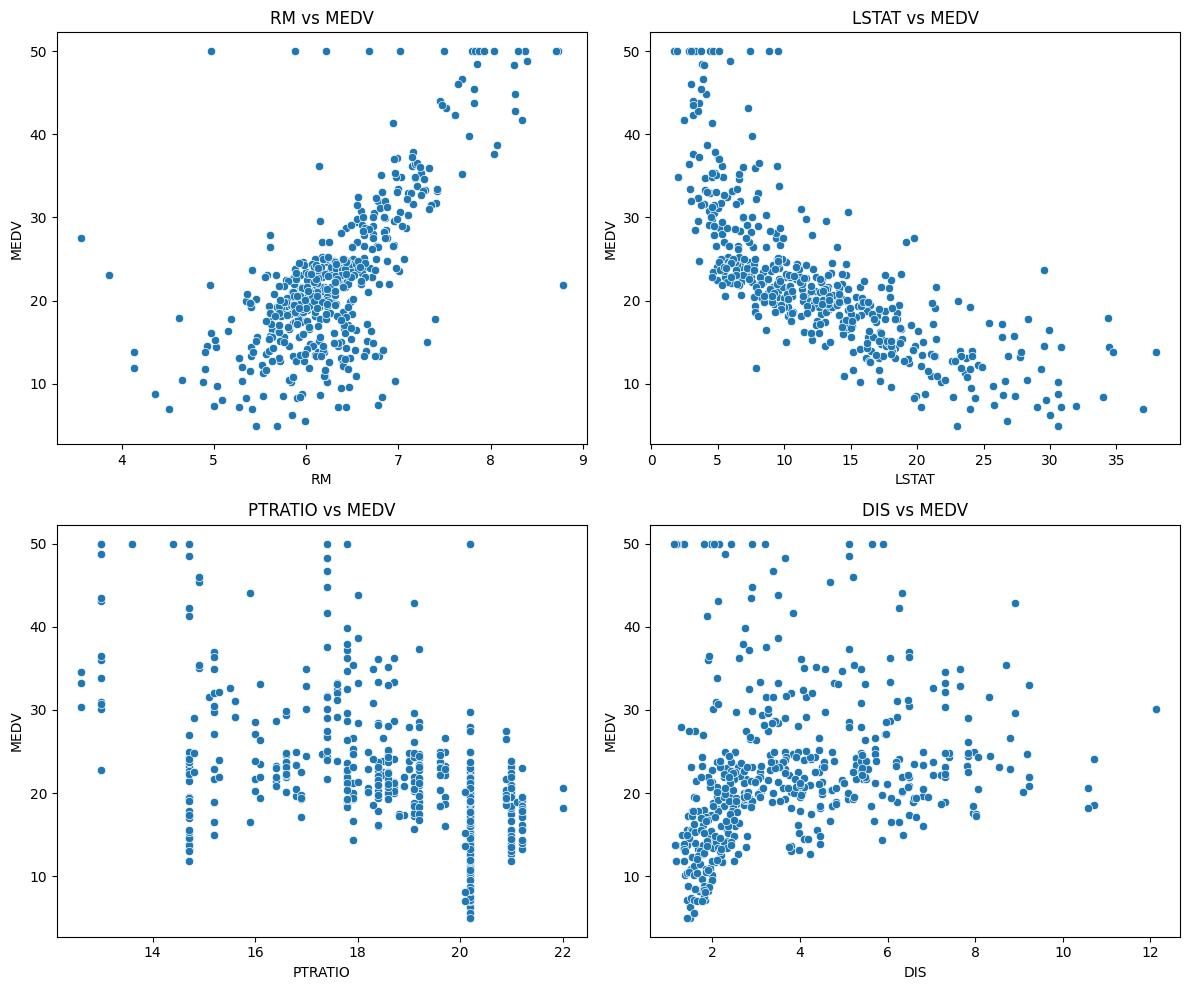

In [24]:
    # Scatter plots for important features
    important_features = ['RM', 'LSTAT', 'PTRATIO', 'DIS']
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    for idx, feature in enumerate(important_features):
        row = idx // 2
        col = idx % 2
        sns.scatterplot(data=df, x=feature, y='MEDV', ax=axes[row, col])
        axes[row, col].set_title(f'{feature} vs MEDV')
    plt.tight_layout()
    plt.show()

# Data Splitting

In [36]:
# Define features (X) and target (y)
X = df.drop('MEDV', axis=1)  # Assuming 'MEDV' is the target variable
y = df['MEDV']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm split proportions
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (354, 13)
Test Set Size: (152, 13)


# Model Selection & Training

## Linear Regression

In [51]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Model Evaluation

In [52]:
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    n = X_test.shape[0]  # number of observations
    p = X_test.shape[1]  # number of predictors
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print("\nModel Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared: {r2:.4f}")
    print(f"Adjusted R-squared: {adjusted_r2:.4f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 3.16
Mean Squared Error (MSE): 21.52
Root Mean Squared Error (RMSE): 4.64
R-squared: 0.7112
Adjusted R-squared: 0.6840


# Feature Importance

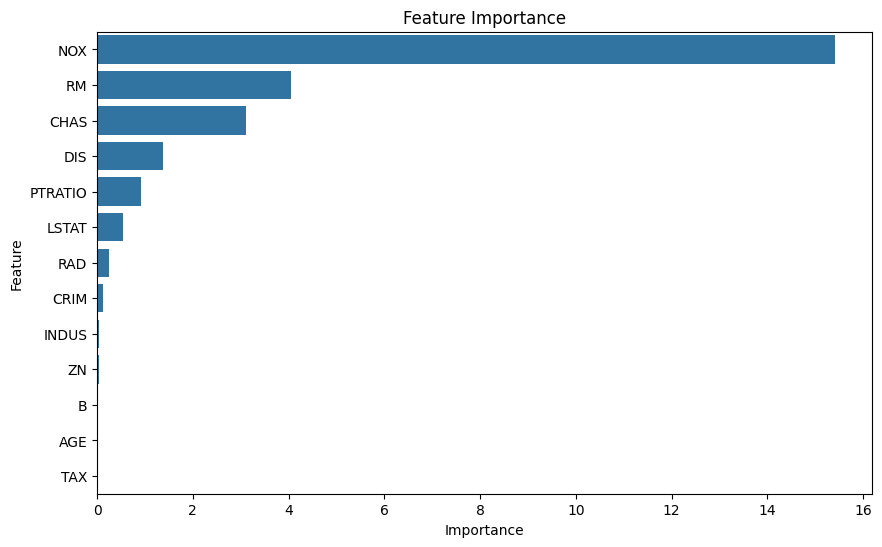

In [54]:
    feature_importance = pd.DataFrame({
        'Feature': column_names[:-1],
        'Importance': abs(model.coef_)
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature')
    plt.title('Feature Importance')
    plt.show()

# Improve the Model

In [92]:
# Create polynomial features (degree 2 for simplicity)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Check the shape of transformed features
print("Original shape:", X.shape)
print("Transformed shape:", X_poly.shape)



Original shape: (506, 13)
Transformed shape: (506, 104)


In [93]:
# Update train-test split with transformed features
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)


In [94]:
# Train Linear Regression on polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)


LinearRegression()

In [100]:
y_pred_poly = model_poly.predict(X_test)

# Calculate metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_poly = 1 - (1 - r2_poly) * (n - 1) / (n - p - 1)

# Print results
print(f"Polynomial Regression -(MAE): {mae_poly:.2f}")
print(f"Polynomial Regression -(MSE): {mse_poly:.2f}")
print(f"Polynomial Regression -(RMSE): {rmse_poly:.2f}")
print(f"Polynomial Regression - R-squared: {r2_poly:.4f}")
print(f"Polynomial Regression Adjusted R-squared: {adjusted_r2_poly:.4f}")

Polynomial Regression -(MAE): 3.06
Polynomial Regression -(MSE): 25.26
Polynomial Regression -(RMSE): 5.03
Polynomial Regression - R-squared: 0.6610
Polynomial Regression Adjusted R-squared: -0.0890


# Comparison of Model Metrics with a Bar Plot

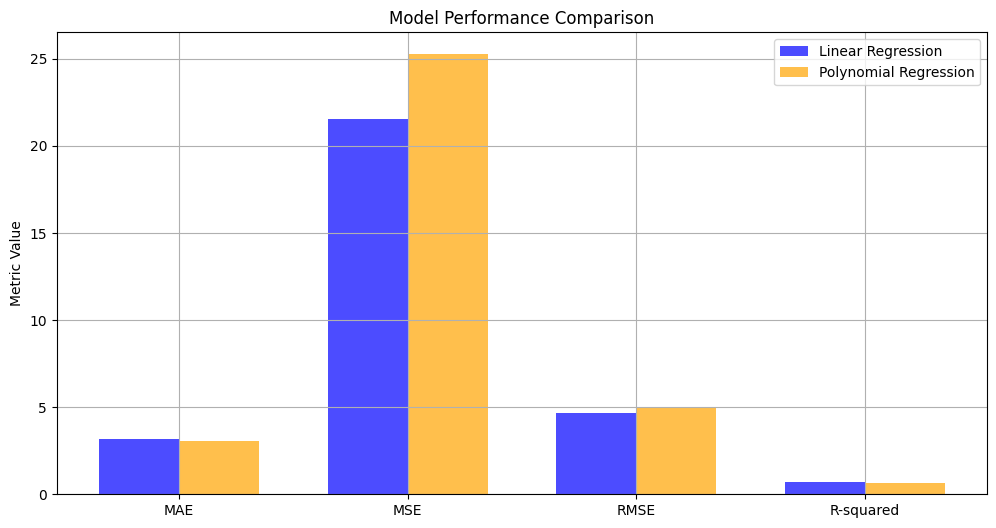

In [107]:
import numpy as np

# Metrics for comparison
metrics = ['MAE', 'MSE', 'RMSE', 'R-squared']
linear_values = [3.16, 21.52, 4.64, 0.7112]  # Metrics from Linear Regression
poly_values = [3.06, 25.26, 5.03, 0.6610]  # Metrics from Polynomial Regression

# Bar plot
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, linear_values, width, label='Linear Regression', color='blue', alpha=0.7)
plt.bar(x + width/2, poly_values, width, label='Polynomial Regression', color='orange', alpha=0.7)

plt.xticks(x, metrics)
plt.ylabel("Metric Value")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid()
plt.show()
